1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


<IPython.core.display.Javascript object>


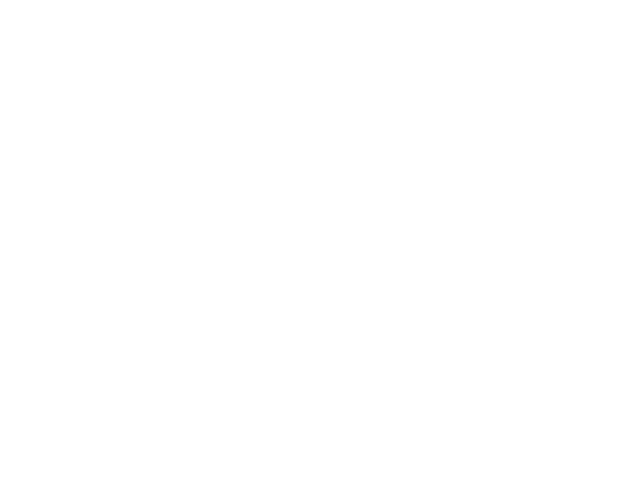

/tmp/ipykernel_44688/3912818456.py:17: RuntimeWarning: divide by zero encountered in true_divide
  plt.errorbar(bin_centers, entries, yerr = 1. / np.sqrt(entries), fmt = 'y.')


<IPython.core.display.Javascript object>


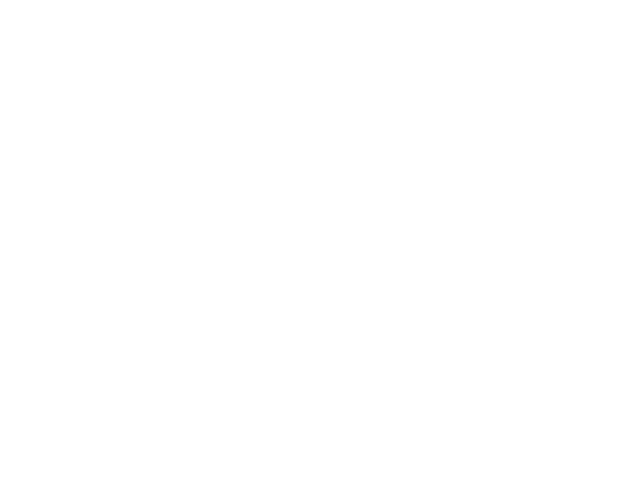

<IPython.core.display.Javascript object>


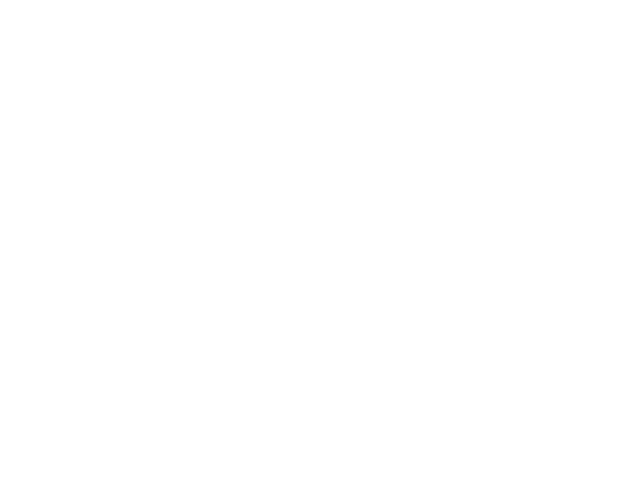

In [1]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy.stats import norm
import scipy

mean = 0.
std = 1.
N = 100
x = np.random.normal(mean, std, N)
fig, ax = plt.subplots(1, 1)
ax.set_ylabel('counts')
ax.yaxis.set_major_locator(MultipleLocator(5))
entries, edges, patches = ax.hist(x, bins=10)
bin_centers = 0.5 * (edges[: -1] + edges[1: ])
plt.errorbar(bin_centers, entries, yerr = 1. / np.sqrt(entries), fmt = 'y.')
plt.show()

fig, ax = plt.subplots(1, 1)
lin = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.set_ylabel('pdf')

sum_pdf = []
for m in x:
    x1 = norm(m, 1.06 * x.std() * x.size ** (-1/5))
    ax.plot(lin, x1.pdf(lin), lw=1, alpha=0.6, label='norm pdf')
    sum_pdf.append(x1.pdf(lin))
    
sum_pdf = np.sum(sum_pdf, 0)
sum_pdf = sum_pdf / scipy.integrate.trapz(sum_pdf, x=lin) * N
fig, ax = plt.subplots(1, 1)
ax.set_ylabel('pdf')
ax.plot(lin, sum_pdf, lw=1, alpha=0.6, label='norm pdf')

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

/bin/bash: /home/giacomo/Programs/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2021-12-14 20:00:42--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com... 162.125.69.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2021-12-14 20:00:42--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc803708095401f891abf45257d4.dl.dropboxusercontent.com/cd/0/inline/Bb3E7JTapz2m6DvZ7xHK191H--wsHlFWR6HtiwNWGk6VJbLkIkqlx7ysMGNCnP6E0JgBgTN6aMDA1kITnNLkjRqIVts9pqROwXw5SCkn99MiGPNktyJc20LI5fY168jqCyTEjAQ-HgEbwg7iPtrNXMI-/file# [following]
--2021-12-14 20:00:42--  https://uc8037080954

<IPython.core.display.Javascript object>


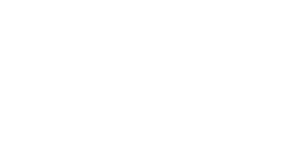

In [2]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

%matplotlib notebook 
import matplotlib.pyplot as plt
import numpy as np

mean_x = [-1, 1, 0]
std_x = [1., 0.1, 0.5]
mean_y = [-2, 0.5, 0.2]
std_y = [0.5, 1., 1]

N = 1000
for mx, my, stdx, stdy in zip(mean_x, mean_y, std_x, std_y):
    x = np.random.normal(mx, stdx, N)
    y = np.random.normal(my, stdy, N)
    plt.scatter(x, y, alpha=0.5)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

          residuals     distances
count  11131.000000  11131.000000
mean      -0.616477      9.771465
std        4.163705      5.877819
min     -160.850000      0.000000
25%       -0.330000      4.400000
50%       -0.110000      9.700000
75%        0.060000     14.900000
max       11.320000     24.900000
          residuals     distances
count  10489.000000  10489.000000
mean      -0.121878      9.954824
std        0.439143      5.847142
min       -2.000000      0.000000
25%       -0.280000      4.700000
50%       -0.100000     10.000000
75%        0.070000     15.100000
max        1.992857     24.900000


<IPython.core.display.Javascript object>


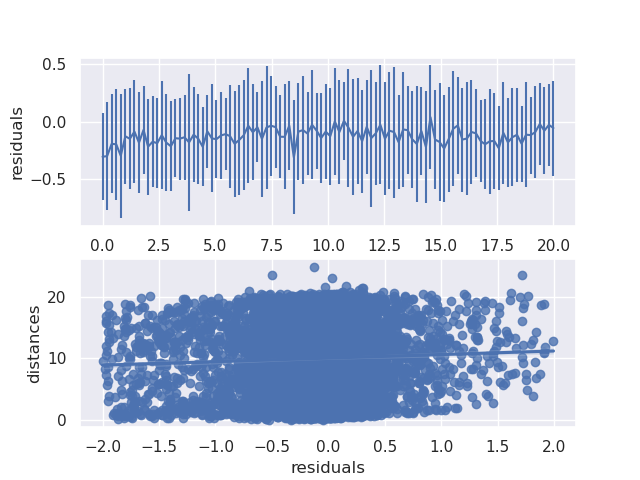

Text(0, 0.5, 'residuals')

In [3]:
%matplotlib notebook 
import os
import pandas as pd
import scipy
import seaborn as sns
sns.set_theme(color_codes=True)
if not os.path.exists('data/residuals_261.npy'):
    !wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy -P ~/data/

data  = np.load('data/residuals_261.npy', allow_pickle=True)
df = pd.DataFrame(data.item())
print(df.describe())
df = df[(df.residuals).abs() < 2]
print(df.describe())
lin = scipy.stats.linregress(df.distances, df.residuals)
N = 100
x = np.linspace(0, 20, N)
dx = 20 / N
res = np.array(df.residuals)
dis = np.array(df.distances)
idx_bin = np.floor(dis / dx)
y = np.array([np.mean(res[idx_bin == int(i)]) for i in range(N)])
erry = np.array([np.std(res[idx_bin == int(i)]) for i in range(N)])
fig, ax =plt.subplots(2,1)
sns.regplot(x="residuals", y="distances", data=df, ax=ax[1])
ax[0].errorbar(x, y, yerr=erry)
ax[0].set_xlabel('distances')
ax[0].set_ylabel('residuals')
